In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [64]:
%matplotlib inline


In [82]:
import seaborn as sns

In [3]:
df = pd.read_csv("playstore_analysis.csv")

In [4]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [6]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
df.shape

(10841, 13)

In [ ]:
# count the number of missing values in each column

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# changing the column name of the given dataset

In [14]:
df.rename({'Content Rating' : 'Content_Rating','Last Updated' : 'Last_Updated','Current Ver' : 'Current_Ver','Android Ver' : 'Android_Ver'},axis = 1,inplace = True
    )

# Tasks


# 1. Data Cleaning : Missing Value Treatment

# a. Drop records where rating is missing since Rating is our target/ Study Variable

In [15]:
# ckecking which Column has null values

In [16]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [17]:
df[df["Rating"].isnull()].index

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1474)

In [18]:
# Dropping the null values from the Rating column

In [19]:
df.drop(index= df[df["Rating"].isnull()].index,inplace = True)

In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       4
Android_Ver       3
dtype: int64

# b. Check the null values for Android Ver Column 

In [21]:
df[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# We have to drop the 3rd record 'Life Made Wi fi...' Because it has the null value in Content_Rating Column

In [22]:
df.drop([10472],inplace = True)

In [23]:
df[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


we have succesfully Dropped the 3rd record

# Replace remaing two missing value with the mode

In [24]:
# here we are finding the mode value of the Android Ver column and storing it into a variable
x = df['Android_Ver'].mode()[0]

In [25]:
x

'4.1 and up'

In [26]:
# filling those null values with mode() values
df['Android_Ver'].fillna(x,inplace = True)

In [27]:
df[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


# There are 4 null values in Current Ver column


# we can replace it with most common value

In [28]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       4
Android_Ver       0
dtype: int64

In [29]:
# Finding the mode value of current ver colummn and storing it into a variable

In [30]:
y = df['Current_Ver'].mode()[0]

In [31]:
y

'Varies with device'

In [32]:
# filling the null values with mode value
df['Current_Ver'].fillna(y,inplace = True)

In [33]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

Finally, We cleaned the all null values

#  Data CLean Up - By changing the datatypes

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [35]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


From this information, we can see that, the column Reviews, Installs and Price have the numeric data ,so we can convert these columns into the numeric datatypes, but there are also 2 columns which are Current Ver and Android Ver can be convert into the numeric datatype,but in those columnns there are some string values which we can drop it or replace it

# we have to remove $ sign from the price column and convert the datatype from object to float

In [36]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [37]:
# Here we are repacing the $ and also converting the data type to float datatype
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

C:\Users\dell\AppData\Local\Temp\ipykernel_13184\3340875324.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


# Now we have to remove ',' And '+' sings from installs column to convert its datypes from object to float or numeric

In [39]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace('+',''))

C:\Users\dell\AppData\Local\Temp\ipykernel_13184\729052519.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace('+',''))


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


now,we can see that the datatype of Installs column is converted into int64 datatypes

# Now we have to convert datatype of Review column from object to numeric

In [41]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


now the datatype of Reviews column is changed from object to int64

# 3.Sanity Check:check for the following and handle accordingly

# a. Avg. rating should be between 1 and 5,as only these values are allowed on the playstore.

# i.Are there any such records? Drop if so.

In [44]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [45]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


There are no such records which have rating greater than 5, so we don't need to drop anything from the Rating Column

# b.Reviews should not be more than installs as only those who can installed can review the app.

# i. Are there any such records? Drop if so.

In [46]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [47]:
sum(df['Reviews']>df['Installs'])

7

There are 7 such records .So we have to drop these records.

In [48]:
df[df['Reviews']>df['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [50]:
df.drop(index = df[df['Reviews']>df['Installs']].index,inplace = True)

In [51]:
df[df['Reviews']> df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


We have sucessfully dropped the 7 records.

# 4. Identify and handle outliers:

# "Price" Column

# i.Make suitable plot to indentify outliers in price

<AxesSubplot:>

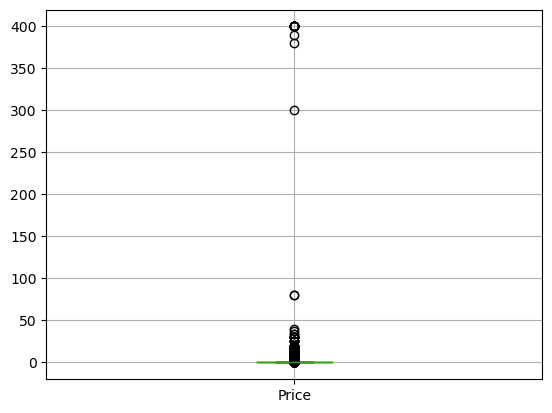

In [52]:
df.boxplot('Price')

So, After Ploting Boxplot for the Price column, we can see that there are some outliers present in the price column and from this we can assume that, there are some outliers beyond value 50.

In [53]:
sum(df['Price']>50)

17

In [54]:
df.drop(index= df[df['Price']>50].index,inplace = True)

In [55]:
df[df['Price']>50]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


<AxesSubplot:>

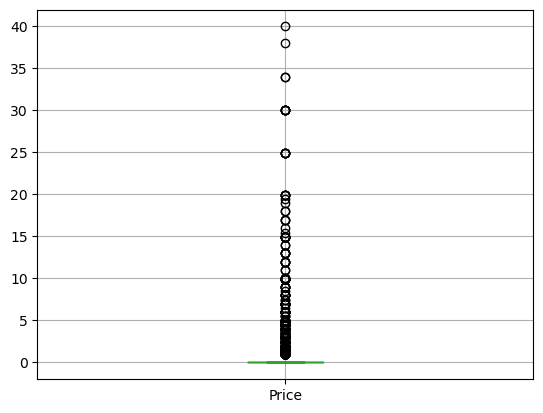

In [65]:
df.boxplot('Price')

we have successfully dropped the outliers

# b. "Reviews" column

# making suitable plot

In [68]:
h = df['Reviews']


<function matplotlib.pyplot.show(close=None, block=None)>

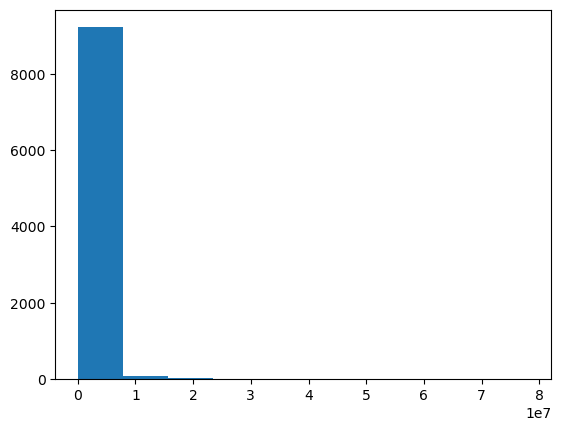

In [69]:
plt.hist(h)
plt.show

# ii. Limit data to apps with < 1 Million reviews

In [70]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [72]:
df[df['Reviews']<1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [73]:
sum(df['Reviews']<1000000)

8638

# c.Installs

# i. What is the 95th percentile of the installs?

In [74]:
# getting the values of the Installs column with 95th percentile 
df['Installs'].quantile(0.95)

100000000.0

# ii. Drop records having a value more than the 95th percentile

In [76]:
df[df['Installs']>df['Installs'].quantile(0.95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,21516.529524,1000000000,Free,0.0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70000.000000,500000000,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up
5856,Google Play Games,FAMILY,4.3,7168735,21516.529524,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device


In [79]:
df[df['Installs']>df['Installs'].quantile(0.95)].index

Int64Index([ 152,  335,  336,  338,  340,  341,  342,  347,  371,  378,
            ...
            4222, 4234, 4365, 4566, 4676, 5395, 5596, 5856, 7536, 9844],
           dtype='int64', length=130)

In [80]:
# here dropping all the values which are more than 95th percentile 
df.drop(index=df[df['Installs']>df['Installs'].quantile(0.95)].index,inplace=True)

Here, we have droped all the Installs Values which are more than 95th percentile

# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

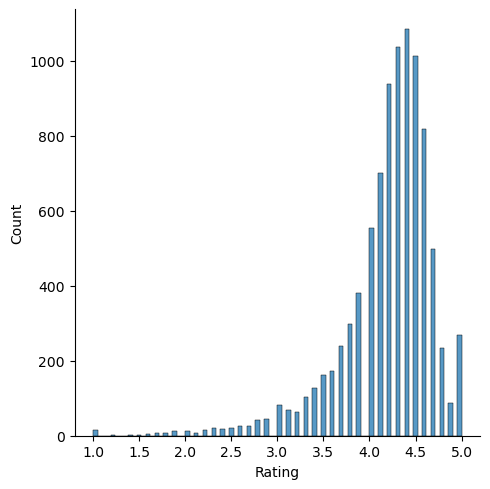

In [83]:
sns.displot(df.Rating)
plt.show()

In [84]:
# finding the skewed value for a Rating column
df['Rating'].skew()

-1.8414193756845025

#  a. How do you explain this?

So, from the above plot we can see that the skewed value is at the left side which is negative, so we can say that the given column or the given plot is left skewed

# b. What is the implication of this on your analysis?

If we have more data then generally there is skewed value present in that dataset.And if there is too many skewed values present in the dataset that is too much skewness present in the coloumn then whatever the model we have, it does't work properly (Statistical Model) So, if we have skewness data and if it's at the right side then it is right skewed data and if the skewness is at the left side then it is left skewed data that is ther are negative values So, to overcome from this and to get the right output from the analysis we can remove this skewness and we can convert it into the bell curve that is the mean is at the centre

# 6. What are the top Content Rating values?

In [85]:
df['Content_Rating'].value_counts()

Everyone           7307
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

# a. Are there any values with very few records?

In [86]:
df['Content_Rating'].value_counts()

Everyone           7307
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

So, after analysis we found that an Adults only 18+ and Unrated have very few records that is 3 and 1 respectively

# b. If yes, drop those as they won’t help in the analysis

In [87]:
# finding the Unrated value in the contect rating column
df[df['Content_Rating']=='Unrated'].index

Int64Index([8266], dtype='int64')

In [88]:
# finding the Adults only 18+ value in the contect rating column
df[df['Content_Rating']=='Adults only 18+'].index

Int64Index([298, 3043, 6424], dtype='int64')

In [89]:
# droping all the values in the given column with given records
df.drop(index=df[df['Content_Rating']=='Unrated'].index, inplace=True)
df.drop(index=df[df['Content_Rating']=='Adults only 18+'].index,inplace=True)

In [90]:
df['Content_Rating'].value_counts()

Everyone        7307
Teen            1055
Mature 17+       458
Everyone 10+     388
Name: Content_Rating, dtype: int64

 So, after the operations we found that, the given data doesn't have any value in the Content Rating column with Unrated and Adults only 18+

# 7. Effect of size on rating

# a. Make a joinplot to understand the effect of size on rating


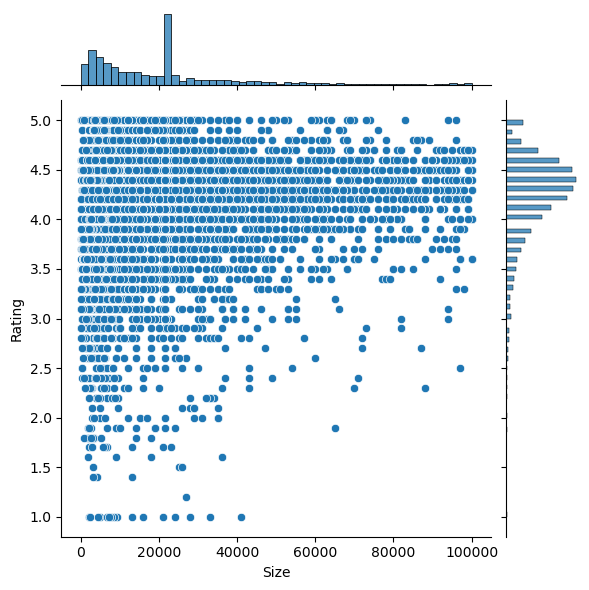

In [105]:
sns.jointplot(x='Size',y='Rating',data=df)
plt.show()

# b. Do you see any patterns?


Yes, from the given plot, we can say that there is correlation between Size and Rating

# c. How do you explain the pattern?

From the given plot, we can see that, on increase in the Rating, the size also increases and there is positive correlation between Size and Rating

# 8. Effect of price on rating

# a. Make a jointplot (with regression line)

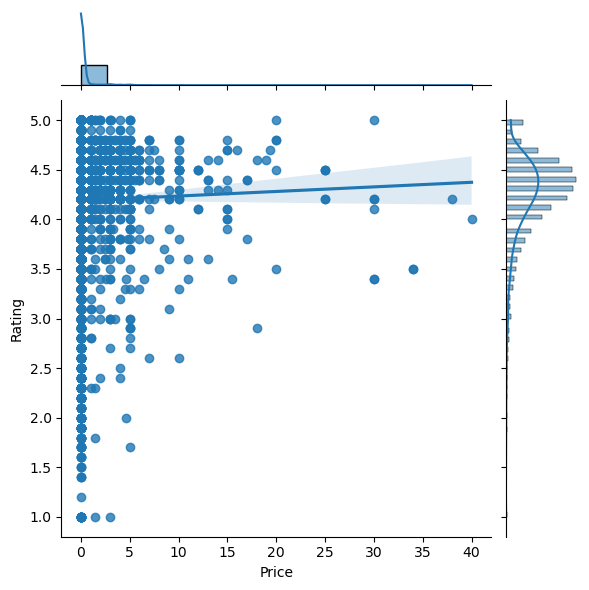

In [93]:
sns.jointplot(x='Price',y='Rating',data=df, kind='reg')
plt.show()

# b. What pattern do you see?

From the given plot, we can say that, on increase in the Price, the Rating remains constant which is greater than 4

# c. How do you explain the pattern?

So, here as on increase in price the rating remains constant which greater than 4 so we can say that, there is weak positive correlation between Rating and Price

# d. Replot the data, this time with only records with price > 0

In [94]:
greatervalue=df[df['Price']>0]
greatervalue

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.529524,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36000.000000,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861.000000,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.000000,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.000000,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


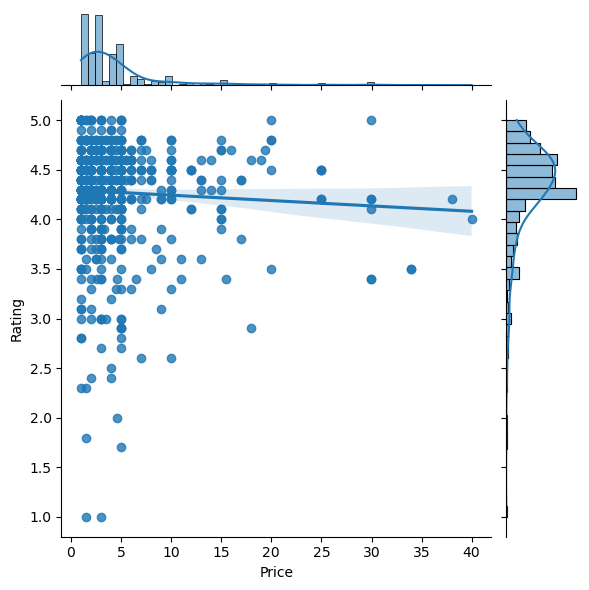

In [95]:
sns.jointplot(x='Price',y='Rating',data=greatervalue, kind='reg')
plt.show()

# e. Does the pattern change?

Yes, the pattern has changed as we have given the condition to the data as Price>0 so we can say that there is negative correlation between Price and Rating

# f. What is your overall inference on the effect of price on the rating

So, from this we can say that, on increase in the price, it doesn't have any effect on the higher rating and the rating is almost constant which is 4

# 9. Look at all the numeric interactions together –

# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

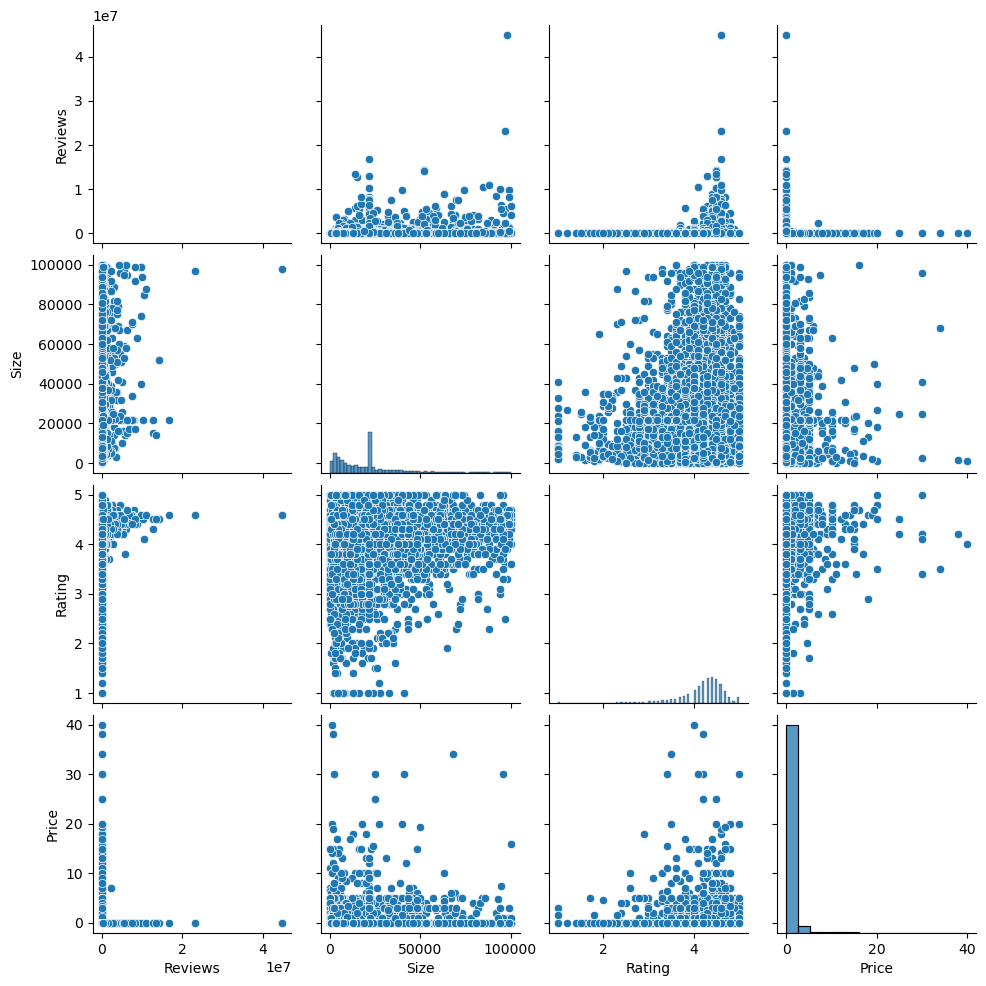

In [96]:
sns.pairplot(df,vars=['Reviews','Size','Rating','Price'])
plt.show()

# 10. Rating vs. content rating

# a. Make a bar plot displaying the rating for each content rating

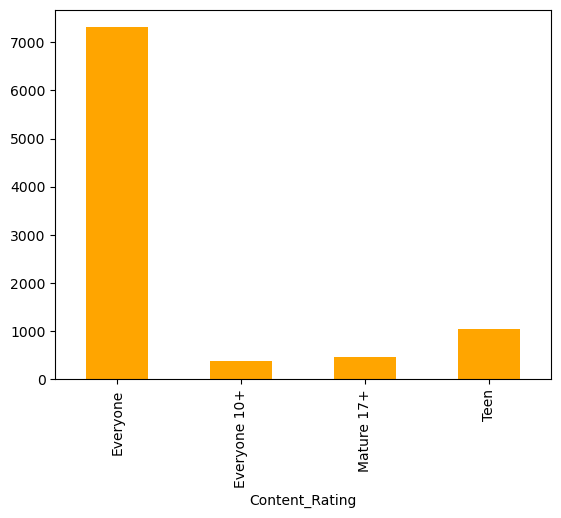

In [97]:
df.groupby(['Content_Rating'])['Rating'].count().plot.bar(color='orange')
plt.show()

# b. Which metric would you use? Mean? Median? Some other quantile?

Here, we will use Median as we have outlier in the Rating. And, Median is the best measure of central tendency to overcome the outlier

# c. Choose the right metric and plot 

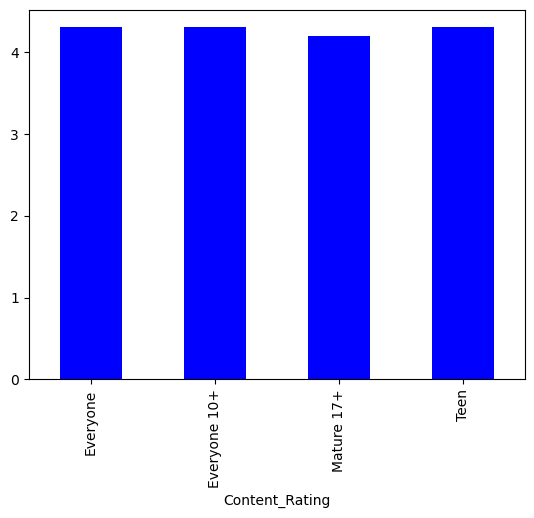

In [98]:
df.groupby(['Content_Rating'])['Rating'].median().plot.bar(color='blue')
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

# a. Create 5 buckets (20% records in each) based on Size

In [101]:
#creating bins (buckets) of the given dataset and then we're giving labels to it. Basically creating the 5 gourps of the dataset 
bins=[0,20000,40000,60000,80000,100000]
labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k']
df['Bucket']=pd.cut(df['Size'],bins,labels=labels)
pd.pivot_table(df,index='Bucket',values='Rating',columns='Content_Rating')

Content_Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,4.149182,4.247561,4.015183,4.190289
20k-40k,4.226398,4.194413,4.193370,4.237500
40k-60k,4.192857,4.265957,4.202222,4.270896
60k-80k,4.265368,4.356818,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [100]:
quant=pd.pivot_table(df, values='Rating', index='Bucket', columns='Content_Rating', aggfunc=lambda x:np.quantile(x,0.2))
quant

Content_Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40k-60k,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


# c. Make a heatmap of this

# i. Annotated

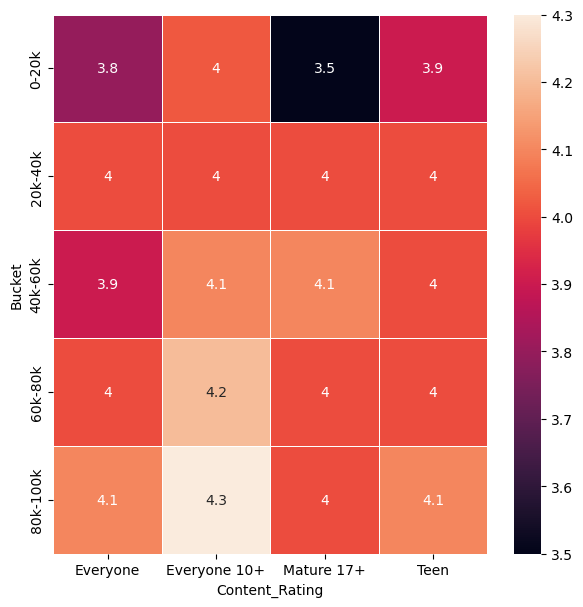

In [102]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(quant, annot=True, linewidths=.5)
plt.show()

# ii. Greens color map

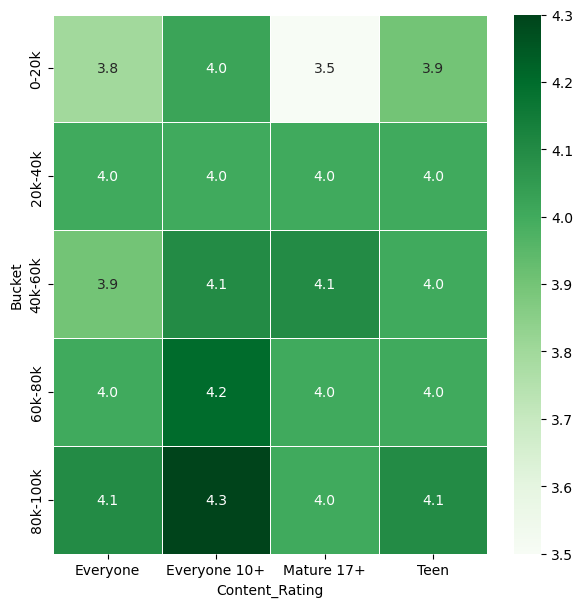

In [104]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(quant, annot=True, cmap='Greens', linewidths=.5, fmt='.1f')
plt.show()

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

From this analysis and plot, we can see that the lighter apps are not preffered in all the categories. Apps with size 40k-60k and 80k-100k have more ratings and also we can say that the size 60k-80k also has the high ratings. So, in short we can say that, whatever the heavier apps are there, they are preferred more in all the caregories